In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

In [300]:
df= pd.read_csv(r"E:\Susmita_Backup\Data Science Course\Data Science Assignment\Logistic Regression\bank-full.csv", delimiter=';')

In [301]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [302]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [350]:
df1=df[['age','default','balance','housing','loan','duration','campaign','previous','pdays','y']]
df1

,age,default,balance,housing,loan,duration,campaign,previous,pdays,y
0,58,no,2143,yes,no,261,1,0,-1,no
1,44,no,29,yes,no,151,1,0,-1,no
2,33,no,2,yes,yes,76,1,0,-1,no
3,47,no,1506,yes,no,92,1,0,-1,no
4,33,no,1,no,no,198,1,0,-1,no
...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,977,3,0,-1,yes
45207,71,no,1729,no,no,456,2,0,-1,yes
45208,72,no,5715,no,no,1127,5,3,184,yes
45209,57,no,668,no,no,508,4,0,-1,no


In [351]:
df2=df1.replace(('yes','no'),(1,0))
df2

,age,default,balance,housing,loan,duration,campaign,previous,pdays,y
0,58,0,2143,1,0,261,1,0,-1,0
1,44,0,29,1,0,151,1,0,-1,0
2,33,0,2,1,1,76,1,0,-1,0
3,47,0,1506,1,0,92,1,0,-1,0
4,33,0,1,0,0,198,1,0,-1,0
...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,0,-1,1
45207,71,0,1729,0,0,456,2,0,-1,1
45208,72,0,5715,0,0,1127,5,3,184,1
45209,57,0,668,0,0,508,4,0,-1,0


In [352]:
df2.corr()

,age,default,balance,housing,loan,duration,campaign,previous,pdays,y
age,1.000000,-0.017879,0.097783,-0.185513,-0.015655,-0.004648,0.004760,0.001288,-0.023758,0.025155
default,-0.017879,1.000000,-0.066745,-0.006025,0.077234,-0.010021,0.016822,-0.018329,-0.029979,-0.022419
balance,0.097783,-0.066745,1.000000,-0.068768,-0.084350,0.021560,-0.014578,0.016674,0.003435,0.052838
housing,-0.185513,-0.006025,-0.068768,1.000000,0.041323,0.005075,-0.023599,0.037076,0.124178,-0.139173
loan,-0.015655,0.077234,-0.084350,0.041323,1.000000,-0.012412,0.009980,-0.011043,-0.022754,-0.068185
duration,-0.004648,-0.010021,0.021560,0.005075,-0.012412,1.000000,-0.084570,0.001203,-0.001565,0.394521
campaign,0.004760,0.016822,-0.014578,-0.023599,0.009980,-0.084570,1.000000,-0.032855,-0.088628,-0.073172
previous,0.001288,-0.018329,0.016674,0.037076,-0.011043,0.001203,-0.032855,1.000000,0.454820,0.093236
pdays,-0.023758,-0.029979,0.003435,0.124178,-0.022754,-0.001565,-0.088628,0.454820,1.000000,0.103621
y,0.025155,-0.022419,0.052838,-0.139173,-0.068185,0.394521,-0.073172,0.093236,0.103621,1.000000


In [353]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   default   45211 non-null  int64
 2   balance   45211 non-null  int64
 3   housing   45211 non-null  int64
 4   loan      45211 non-null  int64
 5   duration  45211 non-null  int64
 6   campaign  45211 non-null  int64
 7   previous  45211 non-null  int64
 8   pdays     45211 non-null  int64
 9   y         45211 non-null  int64
dtypes: int64(10)
memory usage: 3.4 MB


In [354]:
X=df2.iloc[:,0:9]
Y=df2.iloc[:,9]

In [355]:

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X,Y)

C:\Users\Susmita Ranpise\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [356]:
y_pred=lr.predict(X)
print(y_pred)

[0 0 0 ... 1 0 1]


In [357]:
y_pred=pd.Series(y_pred)

In [358]:
y_Pred_df=pd.DataFrame({'Actual':Y,'Predicted Prob':y_pred})
y_Pred_df

,Actual,Predicted Prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [359]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39092   830]
 [ 4196  1093]]


In [361]:
((39092+1093)/(39092+1093+4196+830))*100

88.88323638052687

In [362]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.21      0.30      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.59      0.62     45211
weighted avg       0.86      0.89      0.87     45211



Text(0, 0.5, 'True Positive Rate')

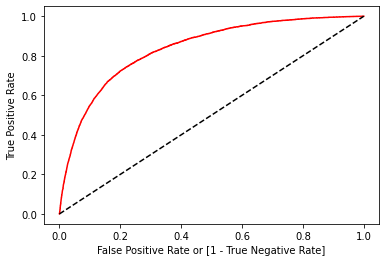

In [363]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, lr.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [364]:
auc

0.5929323904055714